In [2]:
import pandas as pd
import numpy as np 
import collections
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('subscription.csv')
print(data.shape)
data.head()

(500000, 7)


,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


In [4]:
print(data.subscription_monthly_cost.unique().shape)
print(data.country.unique().shape)
print(data.source.unique().shape)

(3,)
(8,)
(3,)


In [5]:
#check if there is any NA value 
data.isnull().any()

user_id                      False
subscription_signup_date     False
subscription_monthly_cost    False
country                      False
source                       False
billing_cycles               False
is_active                    False
dtype: bool

In [6]:
print(data.source.unique().tolist())
print(data.country.unique().tolist())

['ads', 'seo', 'friend_referral']
['Spain', 'France', 'Germany', 'China', 'UK', 'US', 'India', 'Italy']


In [7]:
for column in ['country', 'source']:
    df = pd.get_dummies(data[column], prefix = column)
    data = pd.concat([data, df], axis = 1)
    

In [8]:
data.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active,country_China,country_France,country_Germany,country_India,country_Italy,country_Spain,country_UK,country_US,source_ads,source_friend_referral,source_seo
0,1459,"January, 2015",29,Spain,ads,4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,12474,"January, 2015",49,France,ads,5,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12294,"January, 2015",49,Germany,ads,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3878,"January, 2015",49,China,ads,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9567,"January, 2015",49,UK,ads,5,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
X = data.drop(['user_id', 'subscription_signup_date', 'country', 'source', 'billing_cycles', 'is_active'], axis = 1)
y = data['is_active']

In [11]:
training_data, test_data, train_label, test_label = train_test_split(X, y, test_size = 0.2)

In [14]:
lr = LogisticRegression()
lr.fit(training_data, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred_prob = lr.predict_proba(test_data)[:,1]
##the order is listed in lr.classes_

<IPython.core.display.Javascript object>


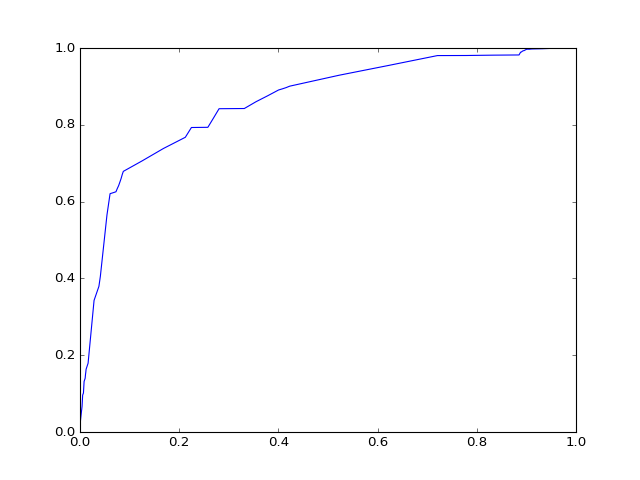

In [46]:
fpr_lr, tpr_lr, threshold = roc_curve(test_label, y_pred_prob)
%matplotlib notebook
plt.plot(fpr_lr, tpr_lr, label='RF')

In [48]:
roc_auc_score(test_label, y_pred_prob)

0.86092371145593272

In [50]:
print(lr.coef_, lr.intercept_)

[[-0.08711554  1.58923822 -0.55520911  0.11820579  1.4068746  -0.58933696
  -0.59419205  0.06932244  0.05689991 -1.02274115  2.05346694  0.47107704]] [ 1.50180283]


In [52]:
training_data.columns

Index(['subscription_monthly_cost', 'country_China', 'country_France',
       'country_Germany', 'country_India', 'country_Italy', 'country_Spain',
       'country_UK', 'country_US', 'source_ads', 'source_friend_referral',
       'source_seo'],
      dtype='object')

In [55]:
data.columns

Index(['user_id', 'subscription_signup_date', 'subscription_monthly_cost',
       'country', 'source', 'billing_cycles', 'is_active', 'country_China',
       'country_France', 'country_Germany', 'country_India', 'country_Italy',
       'country_Spain', 'country_UK', 'country_US', 'source_ads',
       'source_friend_referral', 'source_seo'],
      dtype='object')

In [64]:
data.groupby(['subscription_monthly_cost'])['is_active'].mean()

subscription_monthly_cost
29    0.235901
49    0.048845
99    0.015007
Name: is_active, dtype: float64

In [66]:
data.groupby(['country'])['is_active'].agg(['mean', 'count'])

,mean,count
country,,
China,0.295453,35938
France,0.049688,51662
Germany,0.078465,88944
India,0.225769,48027
Italy,0.048695,47459
Spain,0.048503,44987
UK,0.079494,91252
US,0.078981,91731


In [67]:
data.groupby(['source'])['is_active'].agg(['mean', 'count'])

,mean,count
source,,
ads,0.066237,414469
friend_referral,0.436507,24428
seo,0.194475,61103
